# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2025

# Week 3: Root Finding Supplement

Let's consider the function

$$f(x) = e^x - xe^x = e^x(1-x)$$

Notice that there is exactly one solution to $f(x) =0$, namely $x=1$.

Last lecture, we met several tools for approximating roots. Let's see how well these work for this function.

# Newton's Method 

Let's first use **Newton's Method** with various initial points

$$x_0 = 21 , 2, 10, − 21 , −5.$$

Recall that to use the `newton` function from `scipy.optimize` we must provide `f` and and the derivative `f'` as arguments.

In [1]:
from scipy.optimize import newton
import numpy as np

x0s=[.5,2,10,-.5,-5]

def f(x): return np.exp(x) - x*np.exp(x)

def df(x): return -x*np.exp(x)

def check(x0):
    try:
        return newton(f,x0,fprime=df,maxiter=100,full_output=True)
    except RuntimeError as e:
        return e
        
[ check(x0) for x0 in x0s ]

[(np.float64(1.0),
        converged: True
             flag: converged
   function_calls: 14
       iterations: 7
             root: 1.0
           method: newton),
 (np.float64(1.0),
        converged: True
             flag: converged
   function_calls: 14
       iterations: 7
             root: 1.0
           method: newton),
 (np.float64(1.0),
        converged: True
             flag: converged
   function_calls: 34
       iterations: 17
             root: 1.0
           method: newton),
 RuntimeError('Failed to converge after 100 iterations, value is -105.79532100085905.'),
 RuntimeError('Failed to converge after 100 iterations, value is -107.9896150141256.')]

# Secant Method

Now let's use the secant method with initial approximations
$$(x_0 , x_1 ) = (0, 2), (0, 10), (−1, 2), (−5, 5), (−10, 2)$$


In [54]:
from scipy.optimize import newton
import numpy as np

inits = [(0,2), (0,10), (-1,2), (-5,5), (-10,2) ]

def f(x): return np.exp(x) - x*np.exp(x)

def check(x0,x1):
    try:
        return newton(f,x0,maxiter=100,x1=x1,full_output=True)
    except RuntimeError as e:
        return e

[ check(x0,x1) for x0,x1 in inits]

/tmp/ipykernel_1454714/328907090.py:6: RuntimeWarning: overflow encountered in exp
  def f(x): return np.exp(x) - x*np.exp(x)
/tmp/ipykernel_1454714/328907090.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  def f(x): return np.exp(x) - x*np.exp(x)


[(1.0,
        converged: True
             flag: converged
   function_calls: 14
       iterations: 13
             root: 1.0),
 RuntimeError('Failed to converge after 100 iterations, value is nan.'),
 RuntimeError('Failed to converge after 100 iterations, value is -73.34051390002718.'),
 RuntimeError('Failed to converge after 100 iterations, value is -75.79214196939151.'),
 RuntimeError('Failed to converge after 100 iterations, value is -80.19593559332172.')]

# Bisection Method

Now we use the bisection method with different intervals:

$$[xL , xR ] = [0, 2], [−5, 5], [−10, 2], [−1, 2], [0, 1].$$

In [58]:
from scipy.optimize import bisect
import numpy as np

intervals = [ (0,2), (-5,5), (-10,2), (-1,2), (0,1)]


def f(x): return np.exp(x) - x*np.exp(x)

def check(xl,xr):
    try:
        return bisect(f,xl,xr,full_output=True)
    except RuntimeError as e:
        return e

[ check(a,b) for (a,b) in intervals ]

[(1.0,
        converged: True
             flag: converged
   function_calls: 3
       iterations: 1
             root: 1.0),
 (1.0000000000002274,
        converged: True
             flag: converged
   function_calls: 45
       iterations: 43
             root: 1.0000000000002274),
 (0.9999999999995453,
        converged: True
             flag: converged
   function_calls: 45
       iterations: 43
             root: 0.9999999999995453),
 (0.9999999999995453,
        converged: True
             flag: converged
   function_calls: 43
       iterations: 41
             root: 0.9999999999995453),
 (1.0,
        converged: True
             flag: converged
   function_calls: 2
       iterations: 1612130352
             root: 1.0)]

# Graphical explanation!?

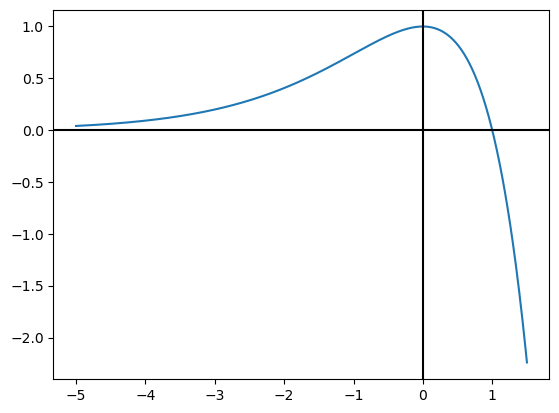

In [75]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-5,1.5,1000)
def f(x): return np.exp(x) - x*np.exp(x)

plt.plot(X,f(X))
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')

Note that $f(x) \to 0$ as $x \to -\infty$.

So if an initial guess is "too far left", then Newton and secant methods iterate further to the left when trying to find the root.

The secant method also failed with the initial guesses $(0,10)$; here  the point is that $f(x) \to -\infty$ quick as $x$ moves to the right. 

# Stopping criteria

This is an example as to why a “stopping criteria” to stop iterating at the $k$ th step
**should not** have the form $f(x_k)≈0$. 

At first thought, checking that `f(xk) < tolerance` where `tolerance` is close to zero (maybe
something like `1E−8`) would be a sufficient stopping condition for root finding. 

However, the asymptotic behavior of the function, where $f → 0$ as $x → −∞$, shows that this is not sufficient
for determining whether the method has found a root. 

For example, let’s say `xk = −22`. Then
`f(−22) = 6.4 × 10−9`, which meets the criteria, and the method would declare the root to be `−22`.
3But we know this is nowhere close to the root. This means that checking that f is close to
zero is not a good way to determine convergence.

A better way to check for convergence would be to examine the actual sequence of iterates
that the method generates, `{x0 , x1 , x2 , ..., xk }` where `xk → x∗` as `k → ∞`. We could check the
difference between `xk` and `x∗` , but we might not know `x∗` . However, we do know that with each
iteration, we expect the iterates to be getting closer to `x∗` , which means that the difference
between successive iterates should be getting smaller. With this reasoning, a better stopping
condition would be to check if `|xk−1 − xk |` is close to zero, i.e., `|xk−1 − xk | < tolerance`, where
`tolerance` should be very small.